In \[5\]:

    import zipfile
    import cv2 as cv
    import numpy as np
    from PIL import Image
    import math
    import pytesseract
    pytesseract.pytesseract.tesseract_cmd = r"C:\\Program Files\\Tesseract-OCR\\tesseract.exe"
    face_cascade = cv.CascadeClassifier("C:/Users/Padmesh/Desktop/PILtesseractopencv/OpenCV/readonly/haarcascade_frontalface_default.xml")


    '''with zipfile.ZipFile("C:/Users/Padmesh/Desktop/PILtesseractopencv/OpenCV/readonly/small_img.zip",'r') as myzip:
        myzip.extractall("C:/Users/Padmesh/Desktop/PILtesseractopencv/OpenCV/extractedfiles")'''


    l = []
    with zipfile.ZipFile("C:/Users/Padmesh/Desktop/PILtesseractopencv/OpenCV/readonly/small_img.zip",'r') as myzip:
        l = myzip.namelist()



    def printingsheet(lstofpages):
        for i in lstofpages:
            print("Results found in {}".format(i))
            img_path = "C:/Users/Padmesh/Desktop/PILtesseractopencv/OpenCV/extractedfiles/{}".format(i)
            img = cv.imread(img_path)
            image = Image.open(img_path).convert('RGB')
            gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
            faces_bounding_boxes = face_cascade.detectMultiScale(gray_img, 1.3, 5)
            face_images = []
            for x, y, w, h in faces_bounding_boxes:
                face = image.crop((x, y, x+w, y+h))
                face_images.append(face)


            if(len(face_images)!=0):
                for face in face_images:
                    face.thumbnail((100, 100), Image.Resampling.LANCZOS)
                t = math.ceil(len(face_images) / 5)
                sheet = Image.new('RGB', (500, 100 * t))
                xc = 0
                yc = 0
                for face in face_images:
                    sheet.paste(face, (xc, yc))
                    if xc + 100 == sheet.width:
                        xc = 0
                        yc += 100
                    else:
                        xc += 100
                display(sheet)
            else:
                print("Results found in {} \nBut there were no faces in that file\n\n".format(i))
                
    def searchkeyword(keyword):
        lst = []
        for page in l:
            cvimg = cv.imread("C:/Users/Padmesh/Desktop/PILtesseractopencv/OpenCV/extractedfiles/{}".format(page))
            text = pytesseract.image_to_string(cvimg)
            if keyword in text:
                lst.append(page)
        if(len(lst)==0):
            print("Word was not found in the file")
        elif(len(lst)!=0):
            printingsheet(lst)

    searchkeyword("Christopher")

    Results found in a-0.png

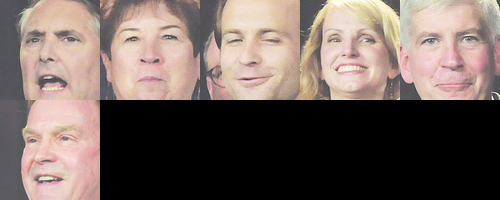

    Results found in a-3.png

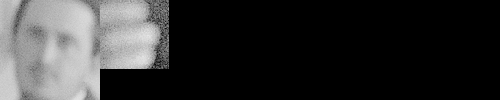

In \[ \]: